# Evaluation examples

In [43]:
%load_ext autoreload
%autoreload 2
import numpy as np
from clustercausal.experiments.Simulator import Simulator
from clustercausal.experiments.Evaluator import Evaluator
from clustercausal.algorithms.ClusterPC import ClusterPC
from clustercausal.clusterdag.ClusterDAG import ClusterDAG
from clustercausal.utils.Utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
import networkx as nx
edge_list = [('X1', 'X2'), ('X2', 'X3')]
G = nx.DiGraph(['X1', 'X2', 'X3', 'X4'])
G.add_edges_from(edge_list)
# G.add_nodes_from(['X1', 'X2', 'X3', 'X4'])
G.nodes()

NodeView(('X', '1', '2', '3', '4', 'X1', 'X2', 'X3'))

In [44]:
%autoreload 2
simulation = Simulator(n_nodes = 5, n_edges = 7, seed = 1234)
cluster_dag = simulation.run()

IndexError: list index out of range

In [ ]:
print(cluster_dag.cluster_mapping)
print(cluster_dag.cluster_edges)

{'C1': ['X8'], 'C2': ['X2'], 'C3': ['X9'], 'C4': ['X3', 'X4', 'X1', 'X5', 'X6'], 'C5': ['X7']}
[('C4', 'C5'), ('C1', 'C4'), ('C2', 'C4'), ('C2', 'C5'), ('C3', 'C4'), ('C1', 'C5')]


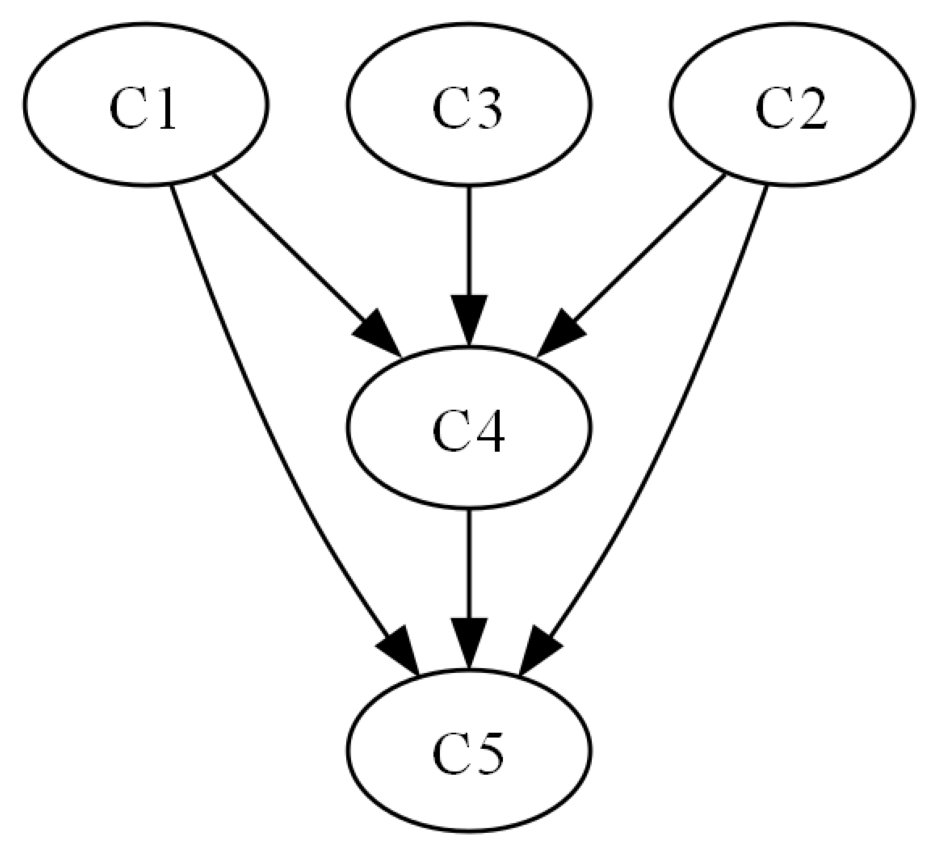

In [ ]:
cluster_dag.draw_cluster_graph()

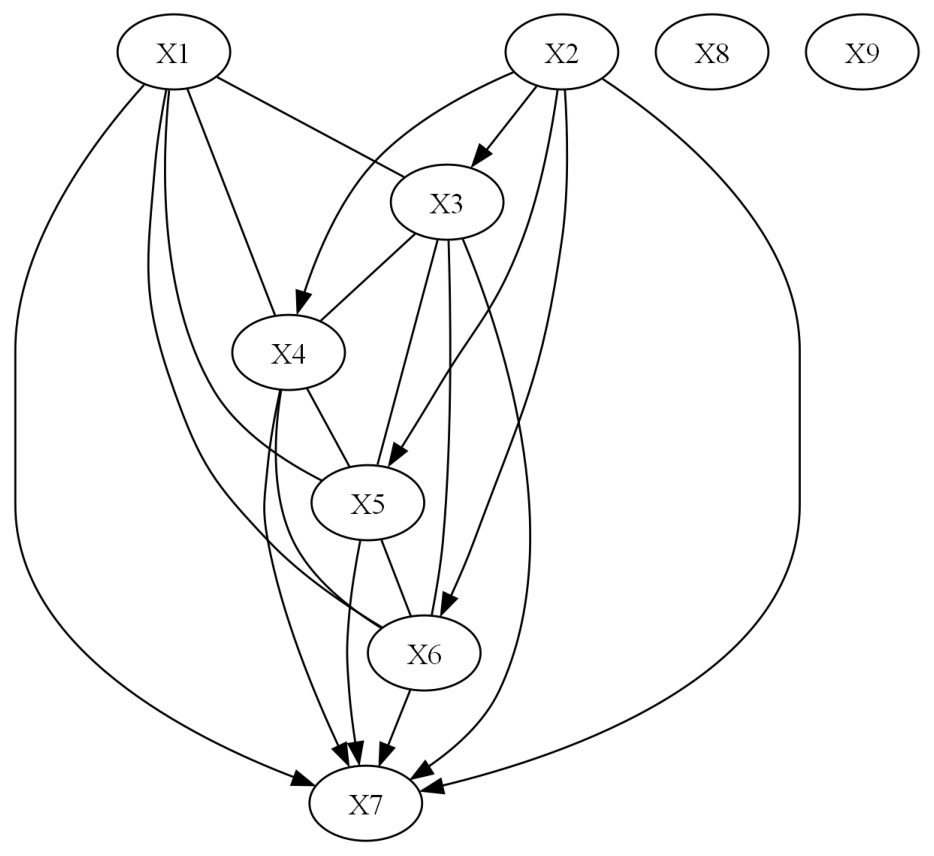

In [ ]:
cluster_dag.cdag_to_mpdag()
cluster_dag.draw_mpdag()

In [ ]:
cluster_pc = ClusterPC(cdag = cluster_dag, data = cluster_dag.data, alpha = 0.05, \
                  indep_test = "fisherz", \
                  verbose = False, show_progress=True)
est_graph = cluster_pc.run()


Beginning work on cluster C1

Intra phase in cluster C1


  0%|          | 0/1 [00:00<?, ?it/s]



Beginning work on cluster C2

Intra phase in cluster C2


  0%|          | 0/1 [00:00<?, ?it/s]



Beginning work on cluster C3

Intra phase in cluster C3


  0%|          | 0/1 [00:00<?, ?it/s]



Beginning work on cluster C4

Inter phase between low cluster C4 and parent C1


Depth=3, working on node 7: 100%|██████████| 6/6 [00:00<00:00, 612.28it/s] 


Deleted edge from X1 to X4
Deleted edge from X3 to X4
Deleted edge from X6 to X1
Deleted edge from X5 to X6
Deleted edge from X3 to X6

Inter phase between low cluster C4 and parent C2


Depth=2, working on node 5: 100%|██████████| 6/6 [00:00<00:00, 859.99it/s] 


Deleted edge from X2 to X3
Deleted edge from X5 to X2
Deleted edge from X4 to X2

Inter phase between low cluster C4 and parent C3


Depth=2, working on node 8: 100%|██████████| 6/6 [00:00<00:00, 857.73it/s] 



Intra phase in cluster C4


Depth=2, working on node 5: 100%|██████████| 5/5 [00:00<00:00, 1004.19it/s]



Beginning work on cluster C5

Inter phase between low cluster C5 and parent C1


Depth=5, working on node 7: 100%|██████████| 2/2 [00:00<00:00, 666.87it/s] 



Inter phase between low cluster C5 and parent C2


Depth=5, working on node 6: 100%|██████████| 2/2 [00:00<00:00, 662.61it/s] 



Inter phase between low cluster C5 and parent C4


Depth=3, working on node 6:   0%|          | 0/6 [00:00<?, ?it/s]          

Deleted edge from X7 to X4


Depth=4, working on node 6: 100%|██████████| 6/6 [00:00<00:00, 667.17it/s] 



Intra phase in cluster C5


Depth=4, working on node 6: 100%|██████████| 1/1 [00:00<00:00, 500.39it/s] 

Applying edge orientation rules
Duration of algorithm was 0.2809021472930908sec


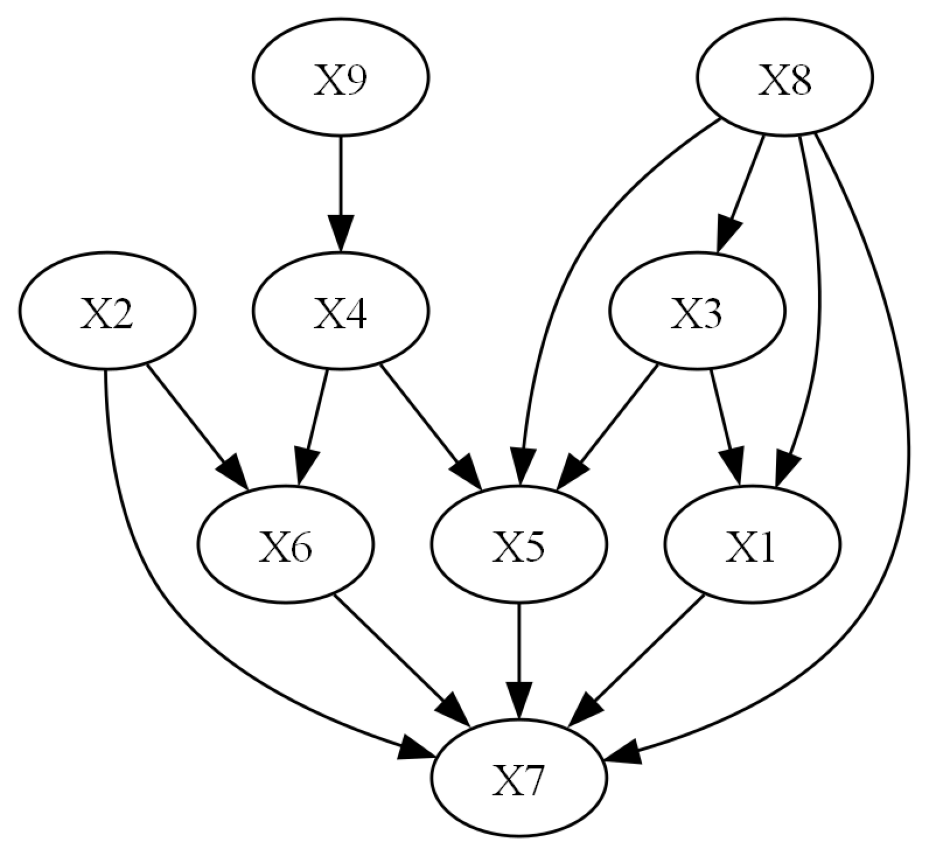

In [ ]:
cluster_dag.true_dag.draw_pydot_graph()

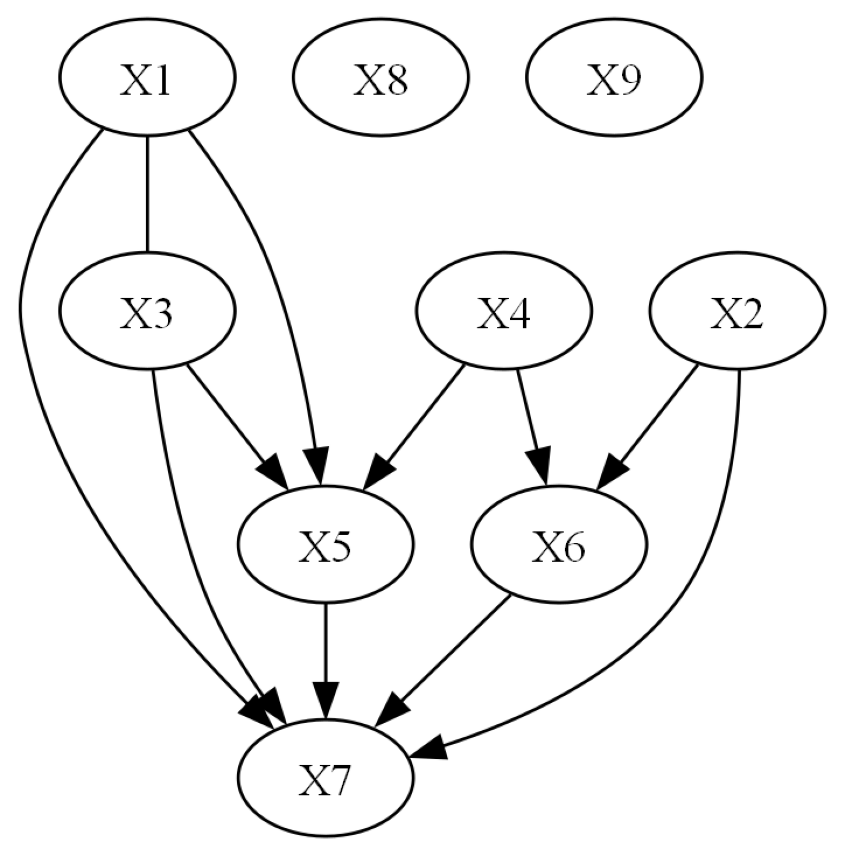

In [ ]:
est_graph.draw_pydot_graph()

In [ ]:
evaluation = Evaluator(truth = cluster_dag.true_dag.G, est = est_graph.G)
adjacency_confusion, arrow_confusion, shd = evaluation.get_causallearn_metrics()
print("Adjacency confusion: ", adjacency_confusion)
print("Arrow confusion: ", arrow_confusion)
print("SHD: ", shd)

Adjacency confusion:  {'true_positive': 9, 'false_positive': 2, 'false_negative': 5, 'true_negative': 20, 'precision': 0.8181818181818182, 'recall': 0.6428571428571429}
Arrow confusion:  {'true_positive': 8.0, 'false_positive': 2.0, 'false_negative': 6.0, 'true_negative': 65.0, 'precision': 0.8, 'recall': 0.5714285714285714, 'true_positive_ce': 8.0, 'false_positive_ce': 0.0, 'false_negative_ce': 1.0, 'true_negative_ce': 72.0, 'precision_ce': 1.0, 'recall_ce': 0.8888888888888888}
SHD:  7


### Low dimensional example

In [ ]:
simulation = Simulator(n_nodes = 5, n_edges = 4, seed = 42)
cluster_dag = simulation.run()

IndexError: list index out of range

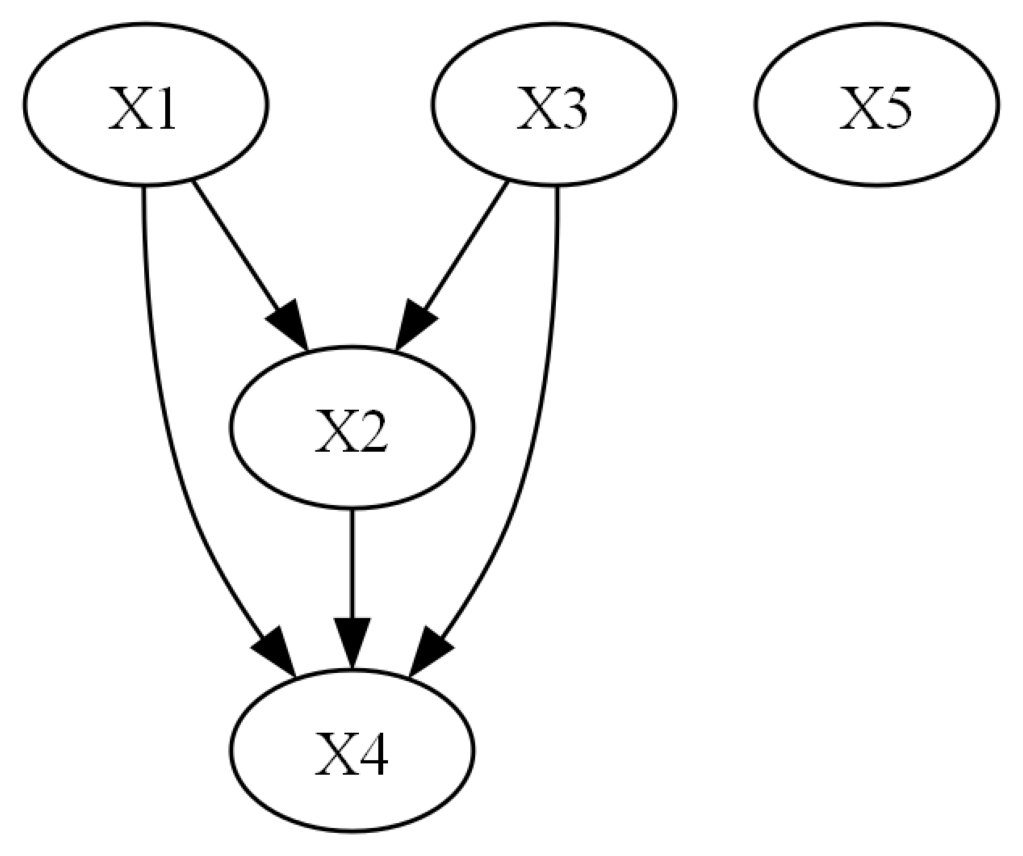

In [ ]:
cluster_dag.true_dag.draw_pydot_graph()

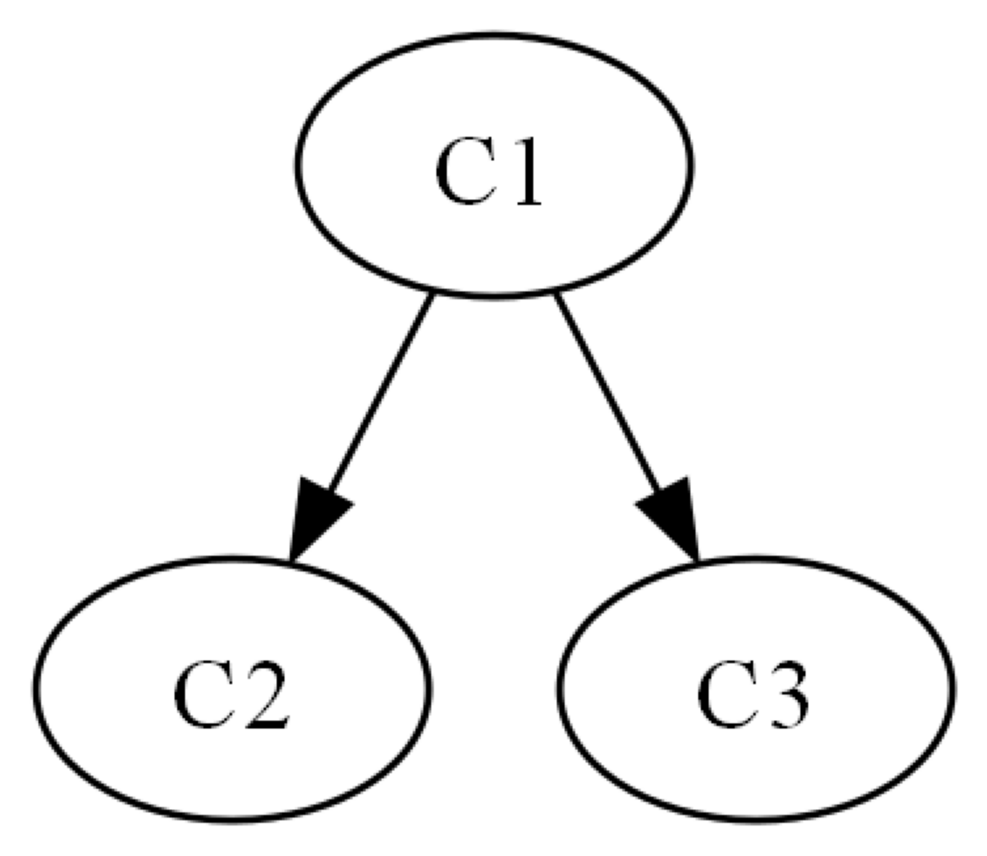

{'C1': ['X3', 'X2'], 'C2': ['X5'], 'C3': ['X4', 'X1']}


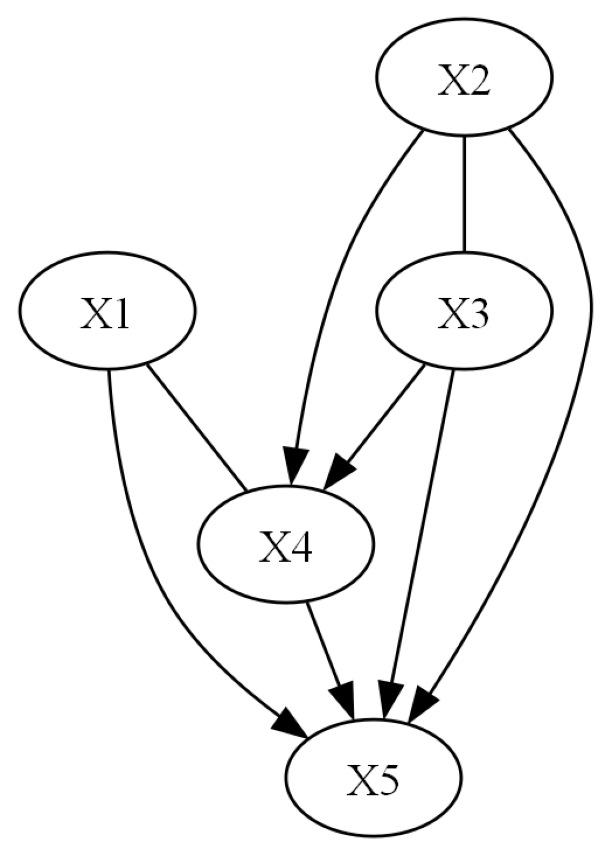

In [ ]:
cluster_dag.draw_cluster_graph()
cluster_dag.cdag_to_mpdag()
print(cluster_dag.cluster_mapping)
cluster_dag.draw_mpdag()

In [ ]:
cluster_pc = ClusterPC(cdag = cluster_dag, data = cluster_dag.data, alpha = 0.05, \
                  indep_test = "fisherz", \
                  verbose = False, show_progress=True)
est_graph = cluster_pc.run()


Beginning work on cluster C1

Intra phase in cluster C1


Depth=0, working on node 2: 100%|██████████| 2/2 [00:00<00:00, 667.25it/s] 



Beginning work on cluster C3

Inter phase between low cluster C3 and parent C1


Depth=2, working on node 3: 100%|██████████| 4/4 [00:00<00:00, 800.71it/s] 



Intra phase in cluster C3


Depth=2, working on node 3: 100%|██████████| 2/2 [00:00<00:00, 500.19it/s] 



Beginning work on cluster C2

Inter phase between low cluster C2 and parent C1


Depth=0, working on node 4: 100%|██████████| 3/3 [00:00<00:00, 597.73it/s] 


Deleted edge from X5 to X3
Deleted edge from X5 to X2

Intra phase in cluster C2


  0%|          | 0/1 [00:00<?, ?it/s]

Applying edge orientation rules
Duration of algorithm was 0.05696725845336914sec


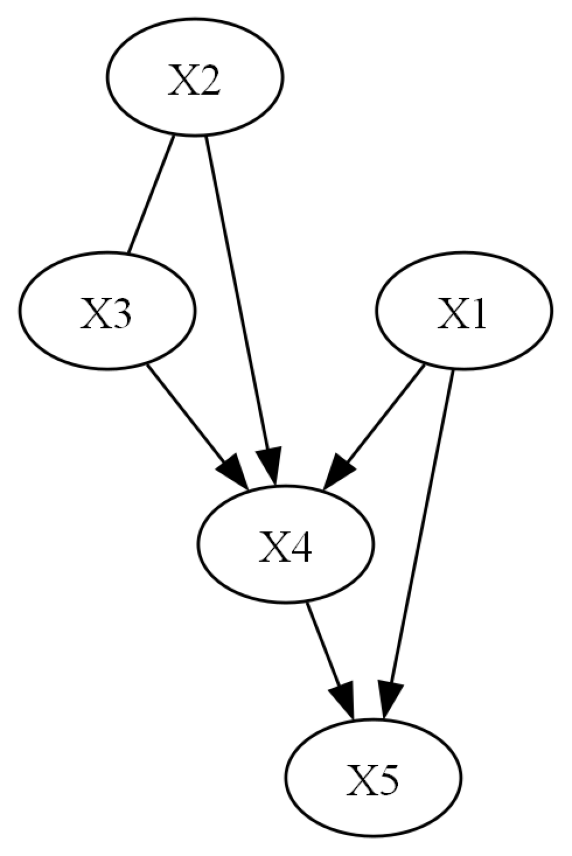

In [ ]:
est_graph.draw_pydot_graph()